## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras
from sklearn import preprocessing
# 請嘗試設定 GPU：os.environ


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
"""
Your code here
"""

def preproc_x(x, flatten=True):
    x = 2*((x-x.min())/(x.max()-x.min())-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
l=[51,5,4,3,88,52,63,21,33,27,61,22,85,99,15]
l2=[]
l.sort()
for i in l:
    a=2*((i-l[0])/(l[-1]-l[0])-0.5)
    l2.append(a)
l2

[-1.0,
 -0.9791666666666666,
 -0.9583333333333334,
 -0.75,
 -0.625,
 -0.6041666666666667,
 -0.5,
 -0.375,
 0.0,
 0.02083333333333326,
 0.20833333333333326,
 0.25,
 0.7083333333333333,
 0.7708333333333333,
 1.0]

In [11]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)               

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 12s 60ms/step - loss: 1.7181 - accuracy: 0.3889 - val_loss: 1.5643 - val_accuracy: 0.4492
Epoch 2/100
196/196 [==============================] - 7s 35ms/step - loss: 1.4905 - accuracy: 0.4750 - val_loss: 1.4883 - val_accuracy: 0.4691
Epoch 3/100
196/196 [==============================] - 7s 35ms/step - loss: 1.3775 - accuracy: 0.5157 - val_loss: 1.4079 - val_accuracy: 0.5049
Epoch 4/100
196/196 [==============================] - 7s 33ms/step - loss: 1.2777 - accuracy: 0.5492 - val_loss: 1.3885 - val_accuracy: 0.5138
Epoch 5/100
196/196 [==============================] - 7s 35ms/step - loss: 1.1915 - accuracy: 0.5802 - val_loss: 1.3861 - val_accuracy: 0.5212
Epoch 6/100
196/196 [==============================] - 7s 34ms/step - loss: 1.1138 - accuracy: 0.6071 - val_loss: 1.3727 - val_accuracy: 0.5259
Epoch 7/100
196/196 [==============================] - 6s 33ms/step - loss: 1.0484 - accuracy: 0.6301 - val_loss: 1.3836 - val_accuracy

196/196 [==============================] - 6s 29ms/step - loss: 0.1115 - accuracy: 0.9634 - val_loss: 3.8927 - val_accuracy: 0.5282
Epoch 58/100
196/196 [==============================] - 6s 29ms/step - loss: 0.1068 - accuracy: 0.9651 - val_loss: 4.0447 - val_accuracy: 0.5235
Epoch 59/100
196/196 [==============================] - 6s 29ms/step - loss: 0.0873 - accuracy: 0.9710 - val_loss: 4.0531 - val_accuracy: 0.5251
Epoch 60/100
196/196 [==============================] - 6s 30ms/step - loss: 0.1004 - accuracy: 0.9670 - val_loss: 4.0590 - val_accuracy: 0.5307
Epoch 61/100
196/196 [==============================] - 7s 33ms/step - loss: 0.0865 - accuracy: 0.9710 - val_loss: 4.1091 - val_accuracy: 0.5260
Epoch 62/100
196/196 [==============================] - 7s 34ms/step - loss: 0.1190 - accuracy: 0.9617 - val_loss: 3.9682 - val_accuracy: 0.5247
Epoch 63/100
196/196 [==============================] - 7s 35ms/step - loss: 0.1062 - accuracy: 0.9656 - val_loss: 3.9850 - val_accuracy: 0.527

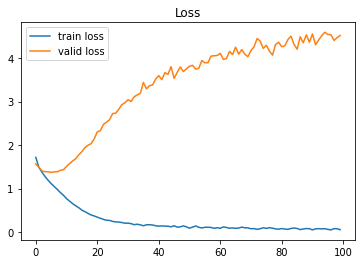

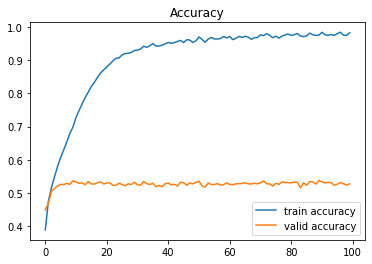

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

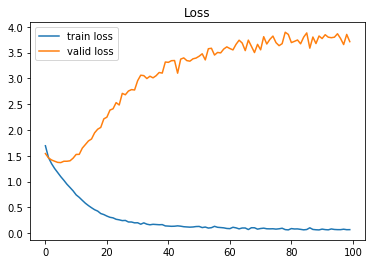

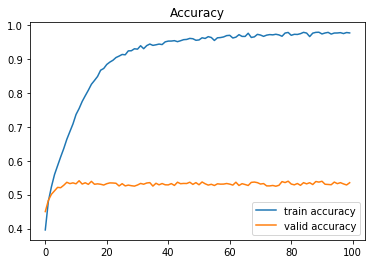

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()